# Micro-proyecto # 1

__Detección de paletas de color a partir de obras de arte.__

Autores: Andrés Vega, David Méndez Acuña

## Intro

En este notebook se explora una manera de obtener paletas de colores a partir de imágenes. Se practicaron los conceptos de aplanamiento y normalización de las imágenes para reducir dimensionalidad y permitir la ejecución del modelo con buen rendimiento. Se aplicó el algoritmo de K-Means, dando como parámetro del modelo los 6 clusters que son requeridos por el ejercicio (entre 5 y 7), se hizo la agrupación y posterior graficación de los resultados.

## Importación de librerías requeridas

In [106]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

## Recopilación de un conjunto diverso de imágenes

Se define el directorio raíz `root_path` y la lista de imágenes `img_files`:

In [107]:
root_path = 'images'
img_files = os.listdir(root_path)
img_files

['aaron-siskind_acolman-1-1955.jpg',
 'adam-baltatu_meridional-landscape.jpg',
 'albert-gleizes_acrobats-1916.jpg']

## Carga de datos

Se define una funcion `load_images()` para la carga de las imágenes. Esta función asume que se tiene un directorio o carpeta con las imágenes, y utiliza funciones como `imread()` y `cvtColor()` para realizar la carga y procesamiento de cada una:

In [108]:
def load_images(root_path, file_names, flatten=True, normalize=True):
    """
    Retorna una lista con arreglos de números. Cada arreglo representa una imagen RGB.
    
    Parametros:
    root_path : str
        Directorio raíz de las imágenes.
    file_names : list
        Lista con los nombres de los archivos de imágenes.
    flatten : bool, opcional
        Si es True, aplana las imágenes a una lista de píxeles de tres dimensiones.
    normalize : bool, opcional
        Si es True, normaliza los valores de píxeles al rango [0, 1].
    """
    image_list = list()
    for file in file_names:
        img = cv2.imread(os.path.join(root_path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if flatten:
            img = img.reshape((-1, 3))
        if normalize:
            img = img / 255.0
        image_list.append(img)
    return image_list

## Preparación de los datos

Se realiza la carga de las imágenes sin modificaciones, es decir, manteniendo tanto las dimensiones originales como los valores de píxeles:

In [109]:
img_original = load_images(root_path, img_files, flatten=False, normalize=False)
img_original

[array([[[233, 235, 234],
         [233, 235, 234],
         [233, 235, 234],
         ...,
         [232, 233, 235],
         [232, 233, 235],
         [232, 233, 235]],
 
        [[233, 235, 234],
         [233, 235, 234],
         [233, 235, 234],
         ...,
         [232, 233, 235],
         [232, 233, 235],
         [232, 233, 235]],
 
        [[233, 235, 234],
         [233, 235, 234],
         [233, 235, 234],
         ...,
         [232, 233, 235],
         [232, 233, 235],
         [232, 233, 235]],
 
        ...,
 
        [[235, 237, 236],
         [235, 237, 236],
         [235, 237, 236],
         ...,
         [234, 235, 237],
         [234, 235, 237],
         [234, 235, 237]],
 
        [[235, 237, 236],
         [235, 237, 236],
         [235, 237, 236],
         ...,
         [234, 235, 237],
         [234, 235, 237],
         [234, 235, 237]],
 
        [[235, 237, 236],
         [235, 237, 236],
         [235, 237, 236],
         ...,
         [234, 235, 237],
  

Por otro lado, se hace la carga de las imágenes como una lista de píxeles, normalizando sus valores para que estén en el rango [0, 1]. Este será el conjunto de datos que se utilizará para el entrenamiento del modelo:

In [110]:
img_list = load_images(root_path, img_files, flatten=True, normalize=True)
img_list

[array([[0.91372549, 0.92156863, 0.91764706],
        [0.91372549, 0.92156863, 0.91764706],
        [0.91372549, 0.92156863, 0.91764706],
        ...,
        [0.91764706, 0.92156863, 0.92941176],
        [0.91764706, 0.92156863, 0.92941176],
        [0.91764706, 0.92156863, 0.92941176]]),
 array([[0.84705882, 0.83137255, 0.78431373],
        [0.84705882, 0.83137255, 0.78431373],
        [0.84705882, 0.83137255, 0.78431373],
        ...,
        [0.8627451 , 0.75686275, 0.58823529],
        [0.8627451 , 0.75686275, 0.58823529],
        [0.8627451 , 0.75686275, 0.58823529]]),
 array([[0.66666667, 0.63137255, 0.50980392],
        [0.67058824, 0.63529412, 0.51372549],
        [0.69803922, 0.6627451 , 0.54117647],
        ...,
        [0.73333333, 0.70588235, 0.63137255],
        [0.7372549 , 0.70980392, 0.63529412],
        [0.7372549 , 0.70980392, 0.63529412]])]

Por ejemplo, las dimensiones de la imagen original son `(ancho, alto, canales)`, mientras que el conjunto de entrenamiento tiene dimensiones `(alto*ancho, canales)`:

In [111]:
img_original[0].shape

(1382, 1922, 3)

In [112]:
img_list[0].shape

(2656204, 3)

Se aprecia entonces una reducción de la dimensionalidad en la data de entrenamiento.

## Construcción del modelo de agrupación - KMeans

Primero debemos especificar el número de clústeres y el parámetro `n_init` el cual es el valor por defecto para el número de veces en que el algoritmo K-Means se ejecuta con diferentes semillas de centroides. Realizaremos una segmentación con seis clústeres y aplicaremos el algoritmo sobre la imagen `img_list[0]`:

In [113]:
kmeans = KMeans(n_clusters=6, n_init = 10)
kmeans.fit(img_list[0])

C:\Users\AV\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

Podemos ver la paleta de colores resultante como los centroides encontrados por el modelo:

In [114]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[0.48031736, 0.47980156, 0.46256656],
       [0.08450633, 0.07816141, 0.06005686],
       [0.8867921 , 0.89028907, 0.88305364],
       [0.33200354, 0.33102587, 0.31367343],
       [0.67122587, 0.67093805, 0.6538449 ],
       [0.20598998, 0.20319765, 0.18592407]])

Se construye una función para graficar la paleta de colores

In [115]:
def print_palette(colors) :
    '''
    Prints a palette with the colors in the parameter. 
    '''
    fig, ax = plt.subplots()
    ax.plot([0, 0],[0, 0])

    lenght = 1
    initial_position = 0
    for i in range(len(colors)):
        color=[colors[i][0], colors[i][1], colors[i][2]]
        ax.add_patch(Rectangle((initial_position, 0), lenght, 6, color=color))
        initial_position += lenght

    plt.axis('off')
    # plt.show()

Y podemos generar una máscara o imagen segmentada con la expresión `centroids[labels]`. Ten en cuenta que, para visualizar la imagen correctamente, reescalamos los valores de píxeles al rango original de [0, 255], y volvemos a las dimensiones originales con `reshape()`:

In [116]:
img_segmented = centroids[labels]*255
img_segmented = img_segmented.reshape(img_original[0].shape)

A continuación puedes visualizar el resultado:

In [117]:
def print_results(original_image):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title('Imagen Original')
  plt.imshow(original_image)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title('Imagen Segmentada con KMeans')
  plt.imshow(img_segmented.astype(np.uint8))
  plt.axis('off')

  print_palette(centroids)

  plt.tight_layout()
  plt.show()

Se imprimen los resultados de la primera imágen

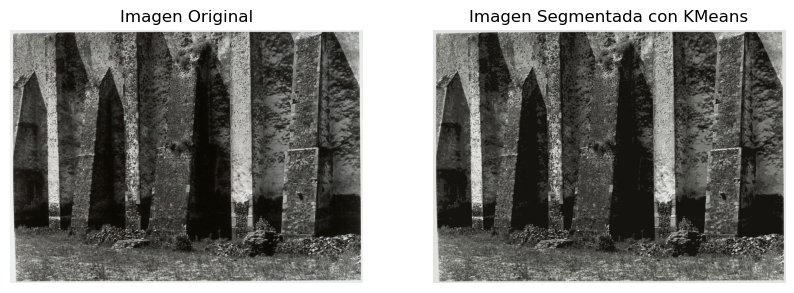

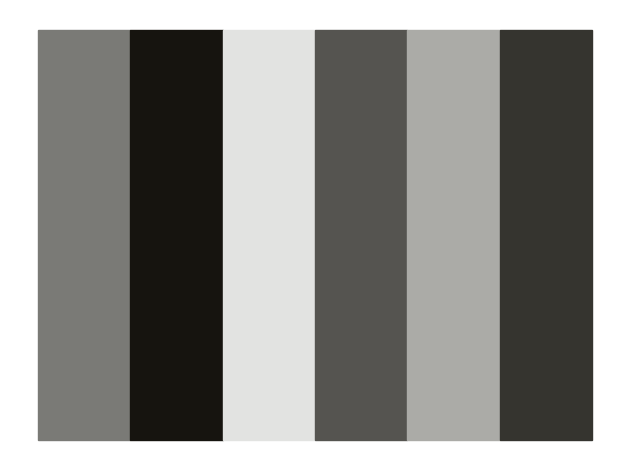

In [118]:
print_results(img_original[0])

Se procesan todas las imágenes secuencialmente

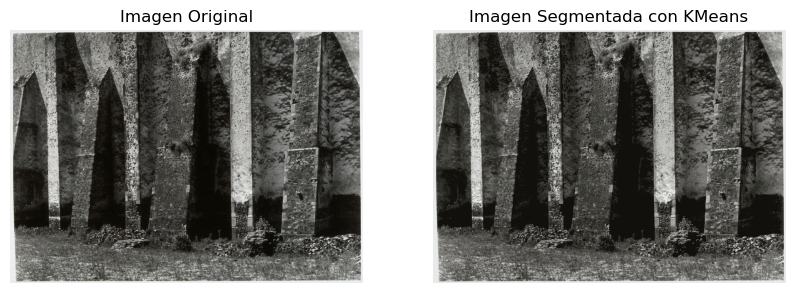

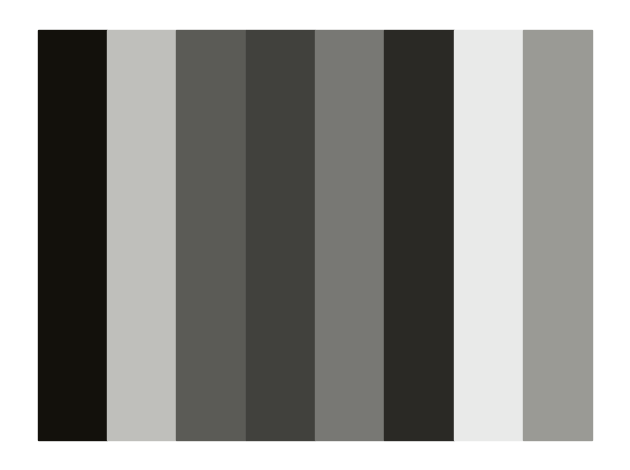

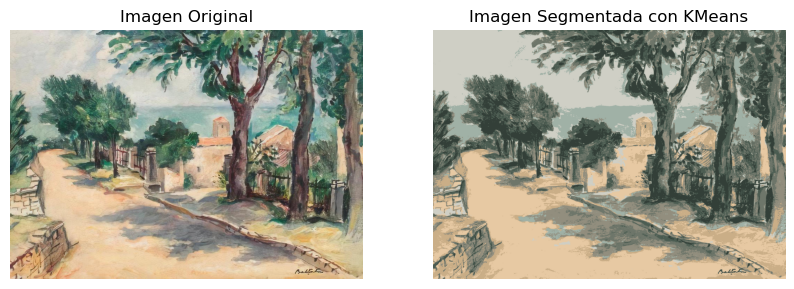

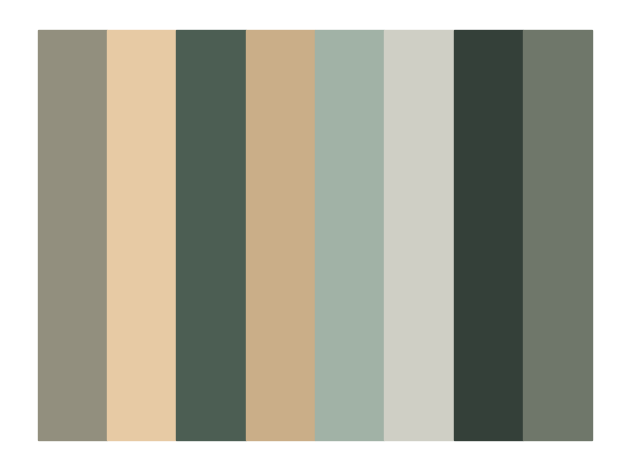

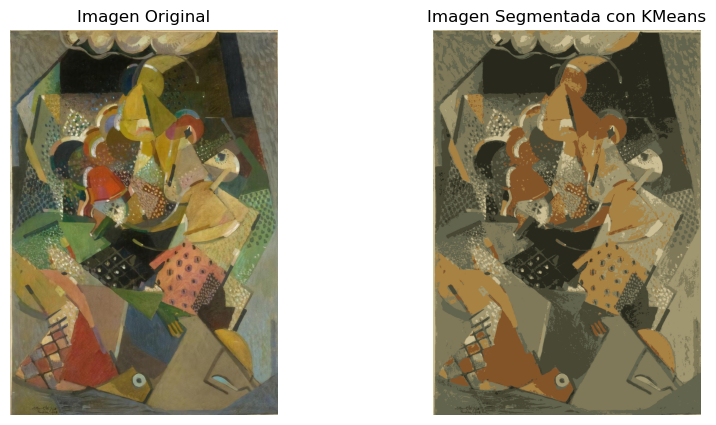

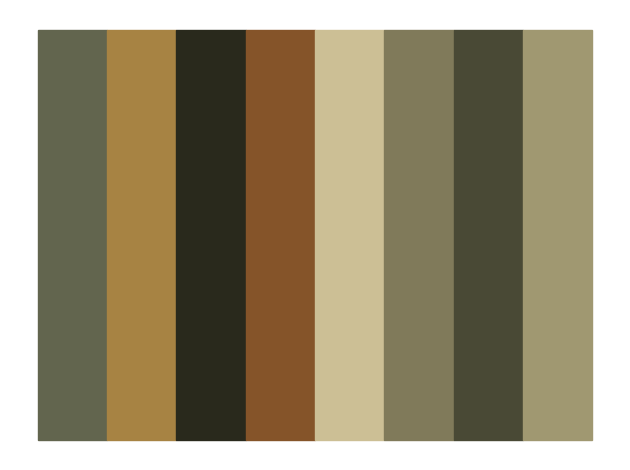

In [121]:
for i in range(len(img_list)):  
  kmeans.fit(img_list[i])
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  img_segmented = centroids[labels]*255
  img_segmented = img_segmented.reshape(img_original[i].shape)
  print_results(img_original[i])

## Pipeline

Especifico un máximo de iteraciones con el parámetro `max_iter`, defino `n_init=10` el cual es el valor por defecto para el número de veces en que el algoritmo K-Means se ejecuta con diferentes semillas de centroides

In [119]:
root_path = 'images'
img_files = os.listdir(root_path)
num_clusters = 6
img_list = load_images(root_path, img_files, flatten=True, normalize=True)
kmeans = KMeans(max_iter=300, n_init=10)
pipe = Pipeline(steps=[("Carga y Normalización", img_list), ("model", kmeans)])